# Testing Original Code 

Found some discrepancies in code and paper description, so here we will be using a varied version of their main.py to print and keep track of exactly how data is used

In [1]:
import os
import torch
import yaml
import re
from tqdm import tqdm
from datasets import get_dataloaders
from eval import eval_model
from methods import get_model
from models import get_net_optimizer_scheduler
from utils.density import GaussianDensityTorch
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


def show_single_image_pair(image_tensor):
    """
    Display a single image or image pair in detail
    Args:
        image_tensor: Single tensor or list of tensors containing the images
    """
    plt.figure(figsize=(10, 5))

    if isinstance(image_tensor, list):
        # Display original
        plt.subplot(1, 2, 1)
        img = image_tensor[0].permute(1, 2, 0).cpu().numpy()
        plt.imshow(img)
        plt.title('Original Image')
        plt.axis('off')

        # Display augmented
        plt.subplot(1, 2, 2)
        aug_img = image_tensor[1].permute(1, 2, 0).cpu().numpy()
        plt.imshow(aug_img)
        plt.title('Augmented Image')
        plt.axis('off')
    else:
        plt.imshow(image_tensor.permute(1, 2, 0).cpu().numpy())
        plt.title('Image')
        plt.axis('off')

    plt.show()


def get_inputs_labels(data):
    """Processes input data to handle both single-task and multi-task scenarios

    This function is crucial for handling data augmentation and task transitions:
    - For single task data (normal samples): assigns label 0
    - For multi-task data (augmented/multiple categories): assigns sequential labels

    Args:
        data: Either a single tensor or list of tensors
            - Single tensor: normal samples from current task
            - List of tensors: samples from multiple tasks/augmentations

    Returns:
        tuple: (processed inputs, corresponding labels)
    """
    if isinstance(data, list):
        # Multi-task scenario: each element represents different task/augmentation
        inputs = [x.to(args.device) for x in data]
        # Creates sequential labels (0,1,2...) for each task
        labels = torch.arange(len(inputs), device=args.device)
        labels = labels.repeat_interleave(inputs[0].size(0))
        inputs = torch.cat(inputs, dim=0)
    else:
        # Single task scenario: all data from same task (normal samples)
        inputs = data.to(args.device)
        # All normal samples get label 0
        labels = torch.zeros(inputs.size(0), device=args.device).long()
    return inputs, labels


class Namespace(object):
    def __init__(self, somedict):
        for key, value in somedict.items():
            # Verify key is valid Python identifier
            assert isinstance(key, str) and re.match("[A-Za-z_-]", key)

            # Recursively create nested Namespace objects for nested dicts
            if isinstance(value, dict):
                self.__dict__[key] = Namespace(value)
            else:
                self.__dict__[key] = value

    def __getattr__(self, attribute):
        raise AttributeError(
            f"Can not find {attribute} in namespace. Please write {attribute} in your config file(xxx.yaml)!")


def get_args():
    """
    Alternative get_args() function used to get arguments for testing in Jupyter, but should work the same in main.py
    Returns:
    """
    # Read YAML file
    with open('./configs/cad.yaml', 'r') as f:
        config = yaml.safe_load(f)

    # Convert to Namespace object
    args = Namespace(config)
    args.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    args.data_dir = "../mvtec_anomaly_detection"
    args.mtd_dir = "../datasets/mtd_ano_mask"
    args.save_checkpoint = True
    args.save_path = '../checkpoints/original_code'
    args.noise_ratio = 0
    args.seed = 42

    return args

C:\Users\chadw\miniforge3\envs\cad\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


------------------------------ Task:0 ------------------------------
loading images
loaded leather : 245 images
loading images
loaded bottle : 209 images
loading images
loaded metal_nut : 220 images
class name: ['leather', 'bottle', 'metal_nut'] number of training sets: 674 number of testing sets: 322


100%|██████████| 50/50 [09:10<00:00, 11.01s/it]


data_type: ['leather', 'bottle', 'metal_nut'] auc: 0.4688862249346121 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.000s...
[t-SNE] Computed neighbors for 322 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.130715
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.977657
[t-SNE] KL divergence after 1000 iterations: 0.253959
mean_auc: 0.468886224934612 **********************
------------------------------ Task:1 ------------------------------
loading images
loaded grid : 264 images
loading images
loaded screw : 320 images
loading images
loaded zipper : 240 images
class name: ['grid', 'screw', 'zipper'] number of training sets: 824 number of testing sets: 389


100%|██████████| 50/50 [09:16<00:00, 11.14s/it]


data_type: ['leather', 'bottle', 'metal_nut'] auc: 0.4351024411508282 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.000s...
[t-SNE] Computed neighbors for 322 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.116017
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.161385
[t-SNE] KL divergence after 1000 iterations: 0.247907
data_type: ['grid', 'screw', 'zipper'] auc: 0.5497295347998556 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 389 samples in 0.000s...
[t-SNE] Computed neighbors for 389 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 389 / 389
[t-SNE] Mean sigma: 0.097152
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.855980
[t-SNE] KL divergence after 1000 iterations: 0.342011
mean_auc: 0.492415987975342 **********************
------------------------------ Task:2 ----

100%|██████████| 50/50 [09:21<00:00, 11.22s/it]


data_type: ['leather', 'bottle', 'metal_nut'] auc: 0.6124128160418483 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.000s...
[t-SNE] Computed neighbors for 322 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.106864
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.161964
[t-SNE] KL divergence after 1000 iterations: 0.245457
data_type: ['grid', 'screw', 'zipper'] auc: 0.5194013703570141 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 389 samples in 0.000s...
[t-SNE] Computed neighbors for 389 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 389 / 389
[t-SNE] Mean sigma: 0.088537
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.062424
[t-SNE] KL divergence after 1000 iterations: 0.360254
data_type: ['tile', 'hazelnut', 'toothbrush'] auc: 0.8247442455242967 **********************


100%|██████████| 50/50 [09:25<00:00, 11.31s/it]


data_type: ['leather', 'bottle', 'metal_nut'] auc: 0.5534001743679162 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.000s...
[t-SNE] Computed neighbors for 322 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.099476
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.138855
[t-SNE] KL divergence after 1000 iterations: 0.256596
data_type: ['grid', 'screw', 'zipper'] auc: 0.5464839523981248 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 389 samples in 0.001s...
[t-SNE] Computed neighbors for 389 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 389 / 389
[t-SNE] Mean sigma: 0.081536
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.707588
[t-SNE] KL divergence after 1000 iterations: 0.343775
data_type: ['tile', 'hazelnut', 'toothbrush'] auc: 0.8122122762148338 **********************


100%|██████████| 50/50 [09:27<00:00, 11.34s/it]


data_type: ['leather', 'bottle', 'metal_nut'] auc: 0.5490409764603313 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.000s...
[t-SNE] Computed neighbors for 322 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.094961
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.472569
[t-SNE] KL divergence after 1000 iterations: 0.265728
data_type: ['grid', 'screw', 'zipper'] auc: 0.5370717634331049 **********************
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 389 samples in 0.000s...
[t-SNE] Computed neighbors for 389 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 389 / 389
[t-SNE] Mean sigma: 0.076801
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.818684
[t-SNE] KL divergence after 1000 iterations: 0.342591
data_type: ['tile', 'hazelnut', 'toothbrush'] auc: 0.7900895140664962 **********************


<Figure size 640x480 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

<Figure size 840x600 with 0 Axes>

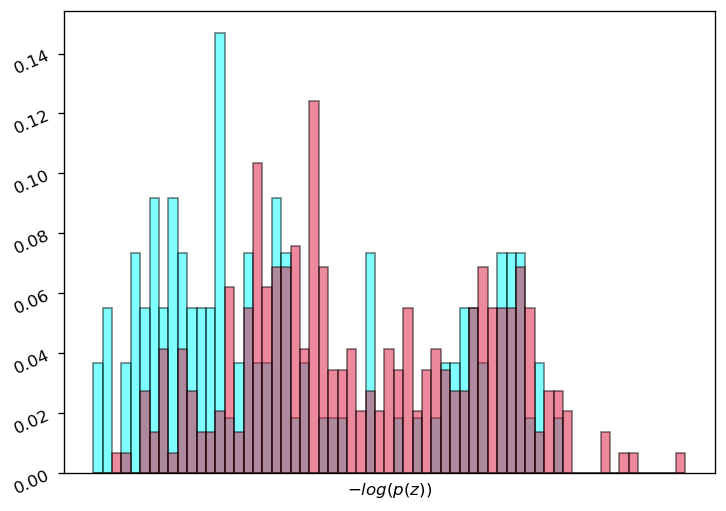

In [2]:
"""Main training loop implementing the CAD framework

This is taken from main.py exactly, with only code removals being for different methods (like other AD/CL methods), but the main.py is unchanged
"""
# Set environment params, and implemented a different get_args() to
# work in Jupyter
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
args = get_args()

# Initialize model components
net, optimizer, scheduler = get_net_optimizer_scheduler(args)
density = GaussianDensityTorch()  # Used for anomaly score calculation
net.to(args.device)

# Get specific model implementation based on method argument
model = get_model(args, net, optimizer, scheduler)

# Initialize storage for tracking tasks and distributions
dataloaders_train = []  # Stores training dataloaders for all tasks
dataloaders_test = []  # Stores test dataloaders for all tasks
learned_tasks = []  # Keeps track of completed tasks
all_test_filenames = []  # Stores filenames for testing

# Statistics storage for calculating final distribution
task_wise_mean = []  # Stores mean embeddings per task
task_wise_cov = []  # Stores covariance matrices per task
task_wise_train_data_nums = []  # Stores number of samples per task

# Main training loop over tasks
for t in range(args.dataset.n_tasks):
    print('---' * 10, f'Task:{t}', '---' * 10)

    # Get dataloaders for current task and update storage
    # First, passes empty lists
    train_dataloader, dataloaders_train, dataloaders_test, learned_tasks, data_train_nums, all_test_filenames, train_data, test_data = \
        get_dataloaders(args, t, dataloaders_train, dataloaders_test, learned_tasks, all_test_filenames)
    task_wise_train_data_nums.append(data_train_nums)

    # Training loop for current task
    net.train()
    for epoch in tqdm(range(args.train.num_epochs)):
        one_epoch_embeds = []  # Stores embeddings from current epoch

        """
        This 'data' is actually a list of two tensors,
        each of shape 32 x 3 x 224 x 224 (B x C x W X H) for ViT
        get_inputs_labels always makes the first tensor normal (label = 0)
        and the second tensor anomalous (label = 1)
        """
        for batch_idx, (data) in enumerate(train_dataloader):
            inputs, labels = get_inputs_labels(data)

        model(epoch, inputs, labels, one_epoch_embeds, t)

    # Periodic evaluation during training
    if args.train.test_epochs > 0 and (epoch + 1) % args.train.test_epochs == 0:
        net.eval()
        # Update density estimation with current embeddings
        density = model.training_epoch(
            density,
            one_epoch_embeds,
            task_wise_mean,
            task_wise_cov,
            task_wise_train_data_nums,
            t
        )
        # Evaluate model on all learned tasks
        eval_model(args, epoch, dataloaders_test, learned_tasks, net, density)
        net.train()

    # Save final model and density estimator after each task
    if args.save_checkpoint:
        torch.save(net, f'{args.save_path}/net_task{t}.pth')
        torch.save(density, f'{args.save_path}/density_task{t}.pth')

First, I augmented their functions to return the original dataset for evaluation. I found that when taking the data directly from there, it does the simple transformation to turn the image into 3 x 224 x 224 for passing to the ViT, which we expect, and there is only one image from the dataset.

In [7]:
# When taking the data from 
print(type(train_data[0]))
print(type(test_data[0][0]), type(test_data[0][1]))
print(test_data[0][0].size())
print(test_data[0][1])

train dataset has a transform
<class 'tuple'>
<class 'torch.Tensor'> <class 'bool'>
torch.Size([3, 224, 224])
True


When taking data directly from the dataloader, the output is a list of size 2, and each item in the list is a batched input tensor. 

In [16]:
for i, val in enumerate(train_dataloader):
    print(type(val), len(val))
    print(val[0].size())
    print(val[1].size())
    break

<class 'list'> 2
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


When visualizing two images, we can see that the two batched tensors seem to correspond, in that the first batched tensor contains slightly augmented but normal samples, while the second batched tensor contains more highly-augmented anomalous samples (images might look weird because they've been transformed and normalized for ViT, so matplotlib doesn't display them as well). We see this when evaluating the labels of these two batched tensors as well.

I found that even though I set strong_augmentation to false, when using DNE, the author's code changes args.dataset.strong_augmentation to TRUE (in get_model() in methods/ __ init __.py), so even though 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


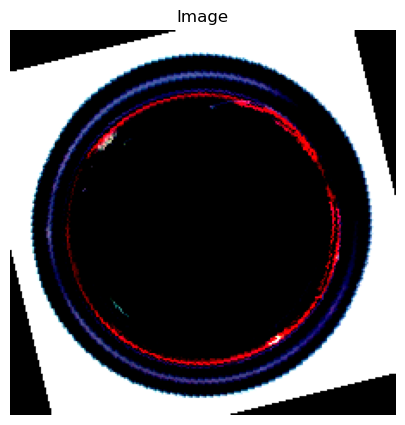

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].


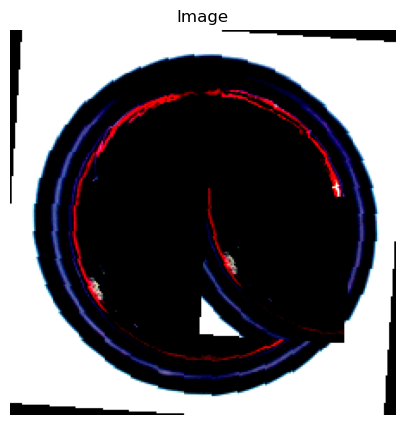

In [25]:
img_sample = 17
print(labels)
show_single_image_pair(val[0][img_sample])
show_single_image_pair(val[1][img_sample])


In [48]:
inputs.shape

torch.Size([64, 3, 224, 224])

In [49]:
labels.shape

torch.Size([64])

In [54]:
data[0].shape

torch.Size([32, 3, 224, 224])